# Neural networks

## overview

1. Basic concepts
2. Training a network
3. Specialized layers

#### a) basic concepts

- **unit**: linear regression and activation function
- **activation**: (ReLU, sigmoid, tanh, softmax)
- **layer**: a collection of units
- **architecture**: the whole thing


### 1. simplest nn

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [26]:
X = np.random.normal(0, 1, (10000, 10))
y = X.max(axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_train.shape, y_train.shape

((8000, 10), (8000,))

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error


model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [40]:
y_pred = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test, )

In [16]:
from keras import Sequential, layers

In [42]:
# 1. Define the model architecture (select the model, define the hyperparameters)
#     - What about the last layer? – needs to take into consideration the problem
model = Sequential([
    layers.Dense(8, activation='tanh', input_shape=(10,)),
    layers.Dense(8, activation='tanh'),
    layers.Dense(1, activation='linear')
])

# 2. Set up the optimizer (algorithm to update the parameters) and the loss function

model.compile(optimizer='adam', loss='mse')

# 3. Train the model (fit the model to the training data) – find the best parameters
model.fit(X_train, y_train, 
          epochs=10, 
          batch_size=32)

# 4. Evaluate the model on the test data
mean_absolute_error(y_test, model.predict(X_test))

Epoch 1/10
250/250 [==============================] - 0s 290us/step - loss: 1.3366
Epoch 2/10
250/250 [==============================] - 0s 267us/step - loss: 0.3440
Epoch 3/10
250/250 [==============================] - 0s 267us/step - loss: 0.3004
Epoch 4/10
250/250 [==============================] - 0s 376us/step - loss: 0.2775
Epoch 5/10
250/250 [==============================] - 0s 270us/step - loss: 0.2638
Epoch 6/10
250/250 [==============================] - 0s 263us/step - loss: 0.2554
Epoch 7/10
250/250 [==============================] - 0s 262us/step - loss: 0.2483
Epoch 8/10
250/250 [==============================] - 0s 373us/step - loss: 0.2412
Epoch 9/10
250/250 [==============================] - 0s 268us/step - loss: 0.2341
Epoch 10/10
63/63 [==============================] - 0s 258us/step


0.37305952995854225

In [17]:
layer = layers.Dense(4)

In [ ]:
layer(X)

### 2. training a nn

Important concepts:
- **loss** function
- **optimizer**:
    - gradient descent
    - the best ones use momentum
        - Adagrad
        - RMSProp (best for RNNs)
        - Adamn (2014) (best for most cases)
- optimizer hyperparameters:
    - **learning rate**
    - **momentum** coefficients (beta1, beta2)
- training hyperparameters:
    - **epochs** – doesn't matter, as many as we need
    - **batch size**:
        - it means: how many samples do we use to calculate the gradient – and update the parameters
        - consequences:
            - smaller batch size:
                - faster convergence (wrt the number of epochs)
                - more stochastic (different batches "say" to update the parameters in different directions)
            - bigger batch size:
                - faster training (if you big GPU's – because of parallelization of matrix operations)



In [43]:
from keras.optimizers import Adam, RMSprop, Adagrad, SGD

Epoch 1/20
200/200 [==============================] - 0s 662us/step - loss: 0.4262 - val_loss: 0.2512
Epoch 2/20
200/200 [==============================] - 0s 363us/step - loss: 0.2249 - val_loss: 0.2105
Epoch 3/20
200/200 [==============================] - 0s 368us/step - loss: 0.1960 - val_loss: 0.2108
Epoch 4/20
200/200 [==============================] - 0s 367us/step - loss: 0.1762 - val_loss: 0.1794
Epoch 5/20
200/200 [==============================] - 0s 483us/step - loss: 0.1590 - val_loss: 0.1685
Epoch 6/20
200/200 [==============================] - 0s 361us/step - loss: 0.1582 - val_loss: 0.1711
Epoch 7/20
200/200 [==============================] - 0s 361us/step - loss: 0.1512 - val_loss: 0.1646
Epoch 8/20
200/200 [==============================] - 0s 362us/step - loss: 0.1506 - val_loss: 0.1659
Epoch 9/20
200/200 [==============================] - 0s 511us/step - loss: 0.1526 - val_loss: 0.1625
Epoch 10/20
200/200 [==============================] - 0s 377us/step - loss: 0.148

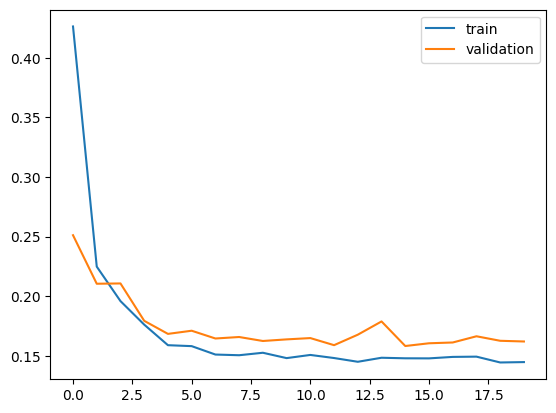

In [49]:
model = Sequential([
    layers.Dense(8, activation='tanh', input_shape=(10,)),
    layers.Dense(8, activation='tanh'),
    layers.Dense(1, activation='linear')
])

# 2. Set up the optimizer (algorithm to update the parameters) and the loss function

model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# 3. Train the model (fit the model to the training data) – find the best parameters
history = model.fit(X_train, y_train,
                    validation_split=0.2, 
                    epochs=20, 
                    batch_size=32,
                    verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'])

Callbacks

In [50]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

In [93]:
def initialize_architecture():
    return Sequential([
        layers.Dense(8, activation='tanh', input_shape=(10,)),
        layers.Dense(8, activation='tanh'),
        layers.Dense(1, activation='linear')
    ])

In [113]:
from datetime import datetime

def now():
    return datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

now()

'2023-12-01_11-08-05'

In [110]:
model = initialize_architecture()

# 2. Set up the optimizer (algorithm to update the parameters) and the loss function

model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# 3. Train the model (fit the model to the training data) – find the best parameters

## 3.1. Set up the callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint(f'checkpoints/basic/{now()}', save_best_only=True)
tensorboard = TensorBoard(f'logs/basic/{now()}',
                          histogram_freq=1,
                          write_graph=True,
                          write_images=True,
                          update_freq='epoch')

model.fit(X_train, y_train,
          validation_split=0.2, 
          epochs=20, 
          batch_size=32,
          callbacks=[early_stopping, checkpoint, tensorboard],
          verbose=1)

Epoch 1/20
200/200 [==============================] - 1s 2ms/step - loss: 0.4336 - val_loss: 0.2484
Epoch 2/20
200/200 [==============================] - 1s 4ms/step - loss: 0.2270 - val_loss: 0.2355
Epoch 3/20
200/200 [==============================] - 0s 2ms/step - loss: 0.2029 - val_loss: 0.2053
Epoch 4/20
200/200 [==============================] - 0s 2ms/step - loss: 0.1825 - val_loss: 0.1971
Epoch 5/20
200/200 [==============================] - 0s 2ms/step - loss: 0.1677 - val_loss: 0.1875
Epoch 6/20
200/200 [==============================] - 1s 3ms/step - loss: 0.1562 - val_loss: 0.1742
Epoch 7/20
200/200 [==============================] - 0s 2ms/step - loss: 0.1508 - val_loss: 0.1625
Epoch 8/20
200/200 [==============================] - 0s 2ms/step - loss: 0.1440 - val_loss: 0.1573
Epoch 9/20
200/200 [==============================] - 0s 453us/step - loss: 0.1425 - val_loss: 0.1725
Epoch 10/20
200/200 [==============================] - 1s 3ms/step - loss: 0.1377 - val_loss: 0.15

In [96]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 323us/step - loss: 0.1482


0.1481897234916687

In [101]:
new_model = initialize_architecture()

new_model.compile(loss='mse')
new_model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 332us/step - loss: 2.9275


2.927513360977173

In [100]:
new_model = initialize_architecture()
new_model.load_weights('checkpoints/basic/')

new_model.compile(loss='mse')
new_model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 358us/step - loss: 0.1431


2023-12-01 10:57:45.206002: W tensorflow/core/util/tensor_slice_reader.cc:96] Could not open checkpoints/basic/: FAILED_PRECONDITION: checkpoints/basic; Is a directory: perhaps your file is in a different file format and you need to use a different restore operator?


0.14312843978405

In [88]:
model.fit(X_train, y_train,
          validation_split=0.2, 
          epochs=2, 
          batch_size=32,
          verbose=1)

Epoch 1/2
200/200 [==============================] - 0s 444us/step - loss: 0.1430 - val_loss: 0.1552
Epoch 2/2
200/200 [==============================] - 0s 360us/step - loss: 0.1472 - val_loss: 0.1575


### 3. specialized layers

#### 3.1 convolution layers

shift-invariance

#### 3.2 recurrent layers

time-invariance

#### 3.3 attention layers

## example: text classification

goal: **Classify emails as spam or not spam.**

### 1. problem statement

- what's the type of task?
- how do we measure performance?

### 2. setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# get emails
url_emails = "https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/10-Natural-Language-Processing/ham_spam_emails.csv"
df = pd.read_csv(url_emails)

# split into train and test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train.shape, df_test.shape

((4582, 2), (1146, 2))

In [9]:
df_train.head()

,text,spam
4860,Subject: re : request for payroll reclassifica...,0
1520,Subject: re : pending approval for ibuyit requ...,0
2083,Subject: congratulations ! hi vince : i just...,0
527,Subject: secretly record all internet activity...,1
3113,"Subject: interviews scheduled for monday , nov...",0


### 3. processing

1. cleaning
2. feature engineering
3. preprocessing

the steps depend on the model you want to use! – which possibilities?

In [ ]:
from emails.preprocessing import EmailCleaner

cleaner_extreme = EmailCleaner(remove_stopwords=True)

cleaner_soft = EmailCleaner(remove_stopwords=False)

### 4. modelling

What models can we use?

### 4.1 Bag-of-Words models